## Template Waveforms

In [1]:
# feel free to change according to your needs

# define session
#data_prefix = "/adata/electro/bt0975/bt0975-23092021-0105/" 
data_prefix = "/adata/electro/pk1330/pk1330-12112021-0101/"  
#data_prefix = "/adata/electro/pk1330/pk1330-10112021-0101/" 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# load templates
templates = np.load(data_prefix + "templates.npy")
n_clusters, n_timepoints, n_channels = templates.shape
print("Clusters:",n_clusters, "timepoints:",n_timepoints,", Channels:",n_channels)


Clusters: 12 timepoints: 82 , Channels: 32


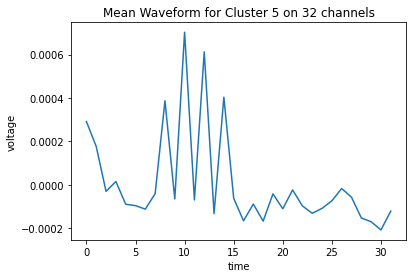

In [3]:
# select a cluster you want to work on
#cluster = 0 # which cluster to analyze
cluster = 5

# get the data for that specific cluster (turns 3 dimensions to 2 dimensions by projecting on that component)
template_cluster = templates[cluster]

# plot mean waveform of all channels
mean_waveform = np.mean(template_cluster, axis=0)

plt.plot(mean_waveform)
plt.title("Mean Waveform for Cluster "+str(cluster)+" on "+str(n_channels)+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()


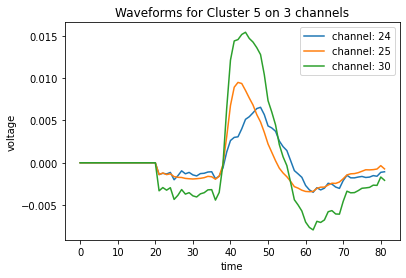

In [4]:
# select some channels
channels = [24,25,30]

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


In [5]:
# ----------------------------------------------------

# get map that puts each spike to its associated template

st = np.load(data_prefix+"spike_templates.npy")

print("There are",len(st),"spikes in total and",len(np.unique(st)),"assignments to templates.")

diffclusters = list(set(range(n_clusters)) - set(np.unique(st)))
print("Clusters not used (",len(diffclusters),"):",diffclusters)

# get index of spikes that were assigned that cluster
spikes_in_cluster = np.where(st==cluster)[0]
print("In that cluster (",cluster,") there are",len(spikes_in_cluster),"spikes.")

# get the corresponding amplitudes
amplitudes = np.load(data_prefix+"amplitudes.npy")
amplitudes_of_spikes_in_cluster = amplitudes[spikes_in_cluster]
mean_amplitude = np.mean(amplitudes_of_spikes_in_cluster)
print("The mean amplitude is",mean_amplitude)


There are 112479 spikes in total and 12 assignments to templates.
Clusters not used ( 0 ): []
In that cluster ( 5 ) there are 4752 spikes.
The mean amplitude is 13.775193096812727


In [6]:
# translate the channels by map

cm = np.load(data_prefix + "channel_map.npy").flatten()

print("channel map:",cm)


channel map: [31 17 30 16 29 25 27 26 18 28 20 24 21 19 22 23  3 13  7 11 12 10  8  9
 14  0 15  1  6  2  5  4]


In [7]:
def get_channels_from_cluster(c):
    # get peak to peak amplitude for each channel
    template_cluster = templates[c]
    amps = np.ptp(template_cluster,axis=0)
    channel_amps = np.array([range(n_channels),amps]).T
    channel_amps = np.flip(sorted(channel_amps, key=lambda x: x[1]))
    channels_with_highest_amp = channel_amps[:5,1]
    channels = channels_with_highest_amp.astype(int)
    return(channels)

for c in range(n_clusters):
    channels = get_channels_from_cluster(c)
    channels_mapped = cm[channels]
    print("cluster",c,": channels:",channels,", mapped=",channels_mapped)


cluster 0 : channels: [1 2 3 0 8] , mapped= [17 30 16 31 18]
cluster 1 : channels: [ 4  6 13 30  9] , mapped= [29 27 19  5 28]
cluster 2 : channels: [ 5  9 11  7 30] , mapped= [25 28 24 26  5]
cluster 3 : channels: [ 8 14 10 12  0] , mapped= [18 22 20 21 31]
cluster 4 : channels: [11  9  5 15  7] , mapped= [24 28 25 23 26]
cluster 5 : channels: [12 10 14  8  0] , mapped= [21 20 22 18 31]
cluster 6 : channels: [13 10  6  8 30] , mapped= [19 20 27 18  5]
cluster 7 : channels: [15  9  7 13  6] , mapped= [23 28 26 19 27]
cluster 8 : channels: [25 17 24 21 19] , mapped= [ 0 13 14 10 11]
cluster 9 : channels: [25 21 19 24 17] , mapped= [ 0 10 11 14 13]
cluster 10 : channels: [ 3  1  2 14  8] , mapped= [16 17 30 22 18]
cluster 11 : channels: [15  7  9  6 11] , mapped= [23 26 28 27 24]


channels for cluster 5 : [12 10 14  8  0]


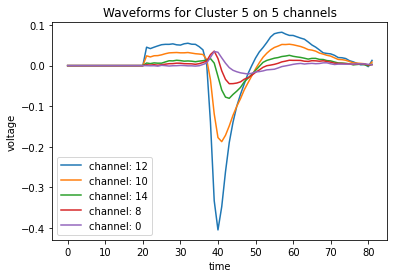

In [8]:
# plot channels with hightest amplitude

channels = get_channels_from_cluster(cluster)
print("channels for cluster",cluster,":",channels)

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


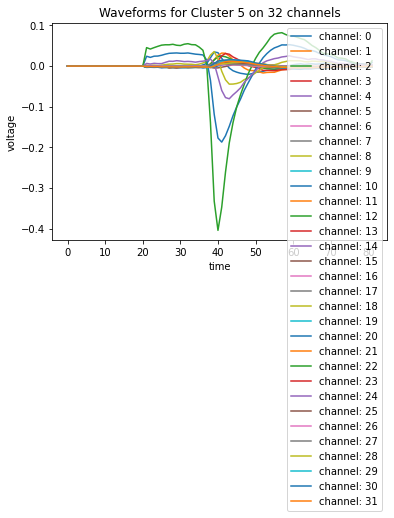

In [9]:
# plot all channels
channels = range(n_channels)

for channel in channels:
	plt.plot( template_cluster[:,channel] , label="channel: "+str(channel) )

plt.title("Waveforms for Cluster "+str(cluster)+" on "+str(len(channels))+" channels")
plt.xlabel("time")
plt.ylabel("voltage")
plt.legend()
plt.show()


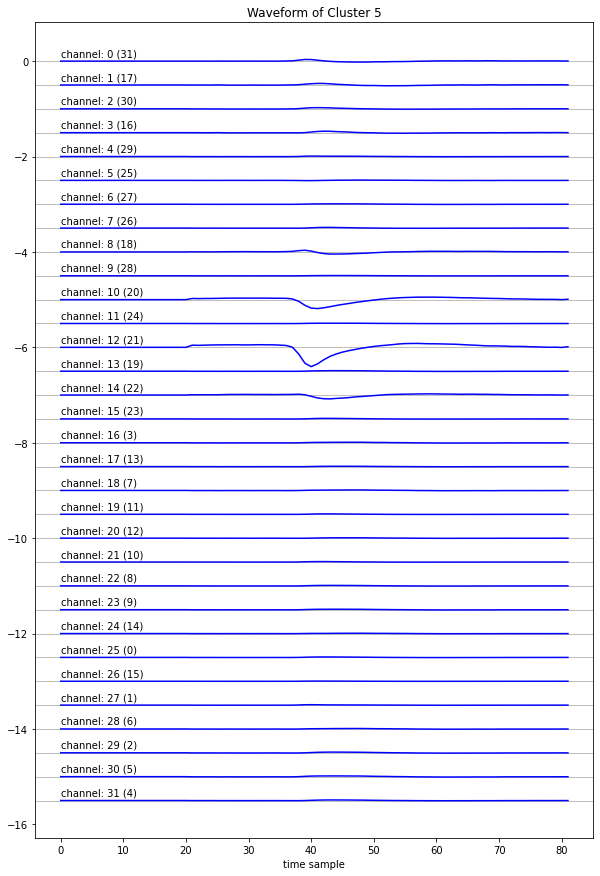

In [10]:
# plot all channels
channels = range(n_channels)

plt.figure(figsize=(10,15))

for i,channel in enumerate(channels):
    plt.axhline( y = -i*.5 , color="grey" , lw=.5 )
    label = "channel: "+str(channel)+" ("+str(cm[channel])+")"
    plt.plot( template_cluster[:,channel] -i*.5 , label=label , color="blue")
    plt.text( s= label , x=0, y=-i*.5 +.1 )
plt.xlabel("time sample")
#plt.legend()
plt.title("Waveform of Cluster "+str(cluster))
plt.show()




## Spike Templates and Clusters
reference: [phy](https://github.com/kwikteam/phy-contrib/blob/master/docs/template-gui.md#concepts)

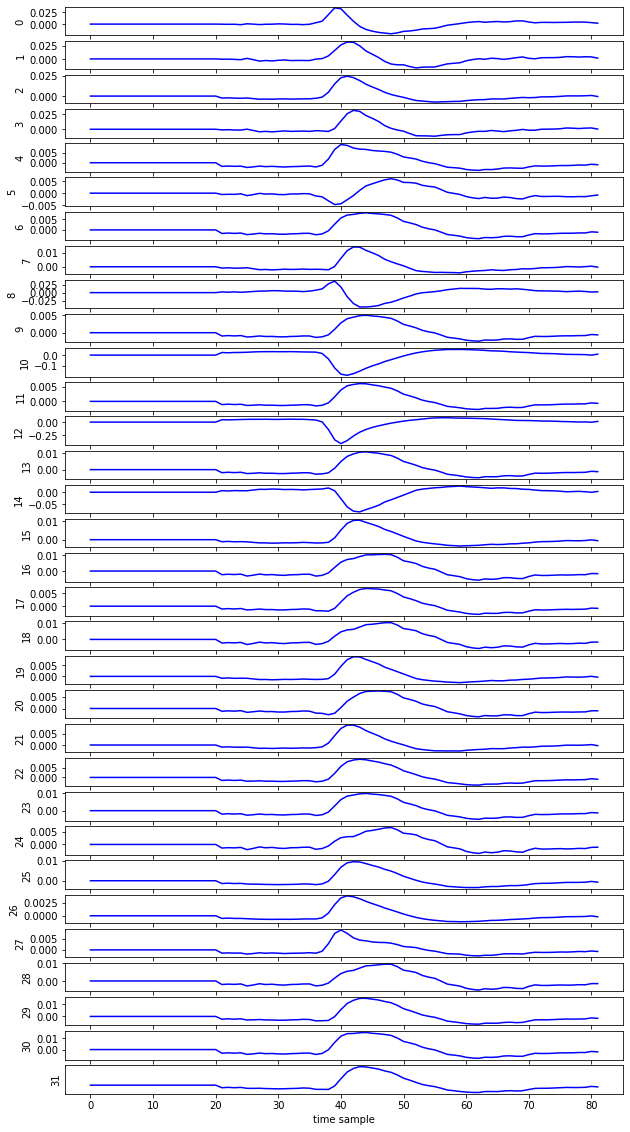

In [11]:
# plot all channels
channels = range(n_channels)

fig, ax = plt.subplots(nrows=n_channels, sharex=True, figsize=(10,20))

for i,channel in enumerate(channels):
    ax[i].plot( template_cluster[:,channel] , label="channel: "+str(channel) , color="blue")
    ax[i].set_ylabel(i)
plt.xlabel("time sample")
plt.yticks([])
plt.show()




In [12]:
# find the difference in templates & clusters after Phy post-processing


import numpy as np

# spike templates
st = np.load(data_prefix + "spike_templates.npy")[:,0]

# spike clusters
sc = np.load(data_prefix + "spike_clusters.npy")



In [13]:
for s in np.unique(st):
    print("template:",s)
    s_ind = np.where(st==s)
    s_clus = sc[s_ind]
    unique, counts = np.unique(s_clus, return_counts=True)
    print(dict(zip(unique, counts)))
    ###if len(unique)
    print(".\n")

template: 0
{12: 2192}
.

template: 1
{12: 5609}
.

template: 2
{2: 9943}
.

template: 3
{3: 4703}
.

template: 4
{4: 4879}
.

template: 5
{5: 4752}
.

template: 6
{6: 56297}
.

template: 7
{7: 366}
.

template: 8
{8: 8794}
.

template: 9
{9: 9410}
.

template: 10
{10: 3660}
.

template: 11
{11: 1874}
.

